## __1. DATA PREPARATION__

### Feature Description :
- 'building_id': ID dari Bangunan
- 'district_id': Lokasi distrik bangunan
- 'vdcmun_id': Kotamadya lokasi bangunan
- 'ward_id': number id dari ward
- 'count_floors_pre_eq': jumlah lantai sebelum gempa 
- 'count_floors_post_eq': jumlah lantai setelah gempa
- 'age_building': umur bangunan dalam tahun
- 'plinth_area_sq_ft': luas area dalam square feet
- 'height_ft_pre_eq': Tinggi Bangunan Sebelum Gempa (in feet)
- 'height_ft_post_eq': Tinggi Bangunan Pasca Gempa (in feet)
- 'land_surface_condition': Kondisi permukaan tanah
- 'foundation_type': Tipe Pondasi
- 'roof_type': Type rangka atap
- 'ground_floor_type': Tipe permukaan 
- 'other_floor_type': Tipe konstruksi permukaan bangunan
- 'position': Posisi Bangunan
- 'plan_configuration': Konfigurasi Bangunan
- 'has_superstructure_adobe_mud': Superstruktur dibuat dari Adobe/Mud (0: No, 1: Yes)
- 'has_superstructure_mud_mortar_stone': Superstruktur dibuat dari Mud Mortar - Stone
- 'has_superstructure_stone_flag': Superstruktur dibuat dari Stone
- 'has_superstructure_cement_mortar_stone': Superstruktur dibuat dari Stone
- 'has_superstructure_mud_mortar_brick': Superstruktur dibuat dari Cement Mortar - Stone
- 'has_superstructure_cement_mortar_brick': Superstruktur dibuat dari Mud Mortar - Brick 
- 'has_superstructure_timber': Superstruktur dibuat dari kayu
- 'has_superstructure_bamboo': Superstruktur dibuat dari bambu 
- 'has_superstructure_rc_non_engineered': Superstruktur bangunan dibuat dari RC
- 'has_superstructure_rc_engineered': Superstruktur bangunan dibuat dari RC 
- 'has_superstructure_other': Superstruktur bangunan dibuat dari bahan lain
- 'condition_post_eq': Kondisi Setelah gempa
- 'damage': Kerusakan Setelah Gempa
- 'technical_solution_proposed': Tanggapan setelah gempa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
building = pd.read_csv('D:\gravity\csv_building_structure.csv')

In [3]:
building.head()

,Unnamed: 0,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,damage
0,0,120101000011,12,1207,120703,1,1,9,288,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Major repair,Low Damage
1,1,120101000021,12,1207,120703,1,1,15,364,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Reconstruction,High Damage
2,2,120101000031,12,1207,120703,1,1,20,384,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,Low Damage
3,3,120101000041,12,1207,120703,1,1,20,312,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,Low Damage
4,4,120101000051,12,1207,120703,1,1,30,308,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,Low Damage


In [4]:
building.describe()

,Unnamed: 0,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,...,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,762106.000000,7.621060e+05,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,...,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000
mean,381052.500000,2.607514e+11,25.767835,2582.688357,258274.277335,2.087783,1.252058,24.326405,406.672576,16.049372,...,0.800271,0.035121,0.015815,0.022961,0.071525,0.258766,0.080482,0.039794,0.016386,0.012026
std,220001.196464,5.801855e+10,5.807555,581.172767,58117.348412,0.655101,1.063275,65.043704,226.779371,5.493878,...,0.399797,0.184086,0.124761,0.149780,0.257701,0.437957,0.272039,0.195474,0.126955,0.109001
min,0.000000,1.201010e+11,12.000000,1201.000000,120101.000000,1.000000,0.000000,0.000000,70.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190526.250000,2.219090e+11,22.000000,2204.000000,220402.000000,2.000000,0.000000,9.000000,280.000000,12.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,381052.500000,2.463020e+11,24.000000,2410.000000,241004.000000,2.000000,1.000000,16.000000,358.000000,16.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,571578.750000,3.036080e+11,30.000000,3010.000000,301006.000000,2.000000,2.000000,27.000000,470.000000,18.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,762105.000000,3.667090e+11,36.000000,3611.000000,361108.000000,9.000000,9.000000,999.000000,5000.000000,99.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 32 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   Unnamed: 0                              762106 non-null  int64 
 1   building_id                             762106 non-null  int64 
 2   district_id                             762106 non-null  int64 
 3   vdcmun_id                               762106 non-null  int64 
 4   ward_id                                 762106 non-null  int64 
 5   count_floors_pre_eq                     762106 non-null  int64 
 6   count_floors_post_eq                    762106 non-null  int64 
 7   age_building                            762106 non-null  int64 
 8   plinth_area_sq_ft                       762106 non-null  int64 
 9   height_ft_pre_eq                        762106 non-null  int64 
 10  height_ft_post_eq                       762106 non-null 

Karena data tinggi dalam feet dan luas dalam sqft, maka saya mengubah besaran feet ke meter dan besaran sqft ke meter persegi

In [6]:
data = building['height_ft_pre_eq']
met= []
for i in range(len(data)):
    dd= round((data[i]/32808)*10000, 2)
    met.append(dd)


In [7]:
data0 = building['height_ft_post_eq']
met1= []
for i in range(len(data0)):
    aa= round((data0[i]/32808)*10000, 2)
    met1.append(aa)

In [8]:
data1 = building['plinth_area_sq_ft']
sq = []
for i in range(len(data1)):
    cc = round((data1[i]/10764)*1000, 2)
    sq.append(cc)

In [9]:
building["height_ft_pre_eq"] = met

In [10]:
building["height_ft_post_eq"] = met1

In [11]:
building['plinth_area_sq_ft'] = sq

In [12]:
building.isna().sum()

Unnamed: 0                                 0
building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_supers

In [13]:
descr = []
for i in building.columns:
    descr.append([
        i,
        building[i].dtypes,
        building[i].isna().sum()
    ])
    
desc = pd.DataFrame(data=descr, columns=['Data Features','Data Types','Null'])
desc

,Data Features,Data Types,Null
0,Unnamed: 0,int64,0
1,building_id,int64,0
2,district_id,int64,0
3,vdcmun_id,int64,0
4,ward_id,int64,0
5,count_floors_pre_eq,int64,0
6,count_floors_post_eq,int64,0
7,age_building,int64,0
8,plinth_area_sq_ft,float64,0
9,height_ft_pre_eq,float64,0


Terdapat data yang hilang di kolom position, plan_configuration, damage_grade dan technical solution proposed

In [14]:
building.dropna(inplace=True)

Disini saya menghapus data yang NaN dikarenakan jumlahnya yang sedikit

In [15]:
building.isna().sum()

Unnamed: 0                                0
building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_br

In [16]:
no_id = building.drop(['building_id', 'district_id', 'vdcmun_id', 'ward_id'], axis=1)

Disini saya melakukan drop pada kolom id, karena kolom tersebut tidak berpengaruh pada describe

In [17]:
no_id

,Unnamed: 0,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,damage
0,0,1,1,9,26.76,2.74,2.74,Flat,Other,Bamboo/Timber-Light roof,...,0,0,0,1,0,0,0,Damaged-Used in risk,Major repair,Low Damage
1,1,1,1,15,33.82,2.74,2.74,Flat,Other,Bamboo/Timber-Light roof,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Reconstruction,High Damage
2,2,1,1,20,35.67,2.74,2.74,Flat,Other,Bamboo/Timber-Light roof,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,Low Damage
3,3,1,1,20,28.99,2.74,2.74,Flat,Other,Bamboo/Timber-Light roof,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,Low Damage
4,4,1,1,30,28.61,2.74,2.74,Flat,Other,Bamboo/Timber-Light roof,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,Low Damage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,762101,2,0,60,15.33,5.49,0.00,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Reconstruction,High Damage
762102,762102,2,0,35,31.77,5.49,0.00,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Reconstruction,High Damage
762103,762103,2,0,35,31.77,5.49,0.00,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Reconstruction,High Damage
762104,762104,2,0,19,28.43,5.49,0.00,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Reconstruction,High Damage


In [40]:
building['roof_type'].unique()

array(['Bamboo/Timber-Light roof', 'Bamboo/Timber-Heavy roof',
       'RCC/RB/RBC'], dtype=object)

In [18]:
no_id.describe()

,Unnamed: 0,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000
mean,381056.489472,2.087787,1.252050,24.325031,37.781040,4.893279,3.008745,0.042402,0.800269,0.035122,0.015816,0.022962,0.071527,0.258770,0.080484,0.039794,0.016386,0.012026
std,220000.625004,0.655104,1.063278,65.034555,21.068364,1.674894,2.614102,0.201504,0.399799,0.184087,0.124762,0.149782,0.257703,0.437959,0.272040,0.195476,0.126956,0.109002
min,0.000000,1.000000,0.000000,0.000000,6.500000,1.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190535.250000,2.000000,0.000000,9.000000,26.010000,3.660000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,381058.500000,2.000000,1.000000,16.000000,33.260000,4.880000,3.350000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,571581.750000,2.000000,2.000000,27.000000,43.660000,5.490000,4.880000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,762105.000000,9.000000,9.000000,999.000000,464.510000,30.180000,30.180000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


dari data diatas, pada kolom umur/age_building terdapat nilai max yaitu 999, berarti bangunan tersebut berumur hampir 1000 tahun yang hampir tidak mungkin
untuk sebuah gedung/kantor, bahkan tidak masuk akal untuk umur dari sebuah bangunan, jadi disini saya akan menghapus dan membatasi umur bangunan menjadi 150

In [19]:
building['age_building'].unique()

array([  9,  15,  20,  30,  18,  13,   8,  22,  10,   3,   2,   7,  50,
        29,  25,  14,  23,  40,   1,  82,  35,  60,  45,  11,  32,  16,
        27,  12,  65,  33,   4,  24,  47,  99,   5,  70,  80,  44,  75,
        21,   6,  17,  58,  57,  19,  26,  28,  95,  90,  71,  55,  39,
        48,  42,  85,   0,  38,  52,  56,  59,  84,  46,  68, 105,  51,
        41,  62,  61,  36,  34,  78, 100,  54,  72,  31,  43,  37,  49,
        81,  53,  69, 187, 999,  66,  63, 102,  87,  79, 140,  88,  64,
       120,  93, 115,  86, 130, 160,  92,  77,  73,  67,  83,  76, 101,
       110, 176,  74, 200, 190, 150, 111, 119,  96,  98,  94,  91,  89,
       125, 167,  97, 123, 103, 180, 112, 133, 116, 145, 114, 121, 144,
       108, 122, 155, 172, 132, 131, 106, 148, 113, 109, 165, 118, 117,
       107, 170, 104, 162, 152, 127, 151, 146, 196, 126, 175, 138, 141,
       178, 128, 149, 164, 199, 135, 166, 168, 156, 161, 142, 185, 173,
       136, 177, 174, 124, 134, 193, 195], dtype=int64)

In [20]:
building[building['age_building']==999]

,Unnamed: 0,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,damage
2004,2004,120306000071,12,1208,120802,2,2,999,20.90,7.62,...,0,0,1,1,0,0,0,Damaged-Used in risk,Minor repair,Low Damage
6113,6113,120903000031,12,1207,120707,2,2,999,32.24,5.18,...,0,0,0,0,0,0,0,Damaged-Used in risk,Major repair,Low Damage
12068,12068,121701000241,12,1207,120706,2,0,999,50.17,4.88,...,0,0,1,0,0,0,0,Damaged-Rubble unclear,Reconstruction,High Damage
12090,12090,121701000461,12,1207,120706,2,2,999,50.17,5.49,...,0,0,1,0,0,0,0,Damaged-Used in risk,Reconstruction,High Damage
12124,12124,121701000811,12,1207,120706,1,1,999,50.17,2.44,...,0,0,1,0,0,0,0,Damaged-Used in risk,Reconstruction,High Damage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757638,757638,366308001581,36,3608,360801,2,2,999,26.01,4.88,...,0,0,0,0,0,0,0,Damaged-Not used,Reconstruction,High Damage
757705,757705,366309000461,36,3608,360801,2,0,999,28.80,4.27,...,0,0,0,0,0,0,0,Damaged-Rubble unclear,Reconstruction,High Damage
757723,757723,366309000651,36,3608,360801,2,2,999,29.73,4.88,...,0,0,0,0,0,0,0,Damaged-Not used,Reconstruction,High Damage
757789,757789,366309001301,36,3608,360801,2,2,999,22.30,4.57,...,0,0,0,0,0,0,0,Damaged-Not used,Reconstruction,High Damage


In [21]:
building['age_building'].value_counts()

15     49983
20     46525
10     39794
25     37063
12     36458
       ...  
138        1
146        1
136        1
144        1
148        1
Name: age_building, Length: 176, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


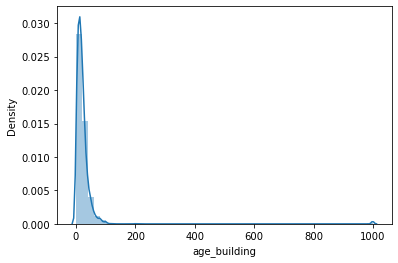

In [22]:
sns.distplot(building['age_building'])
plt.show()

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


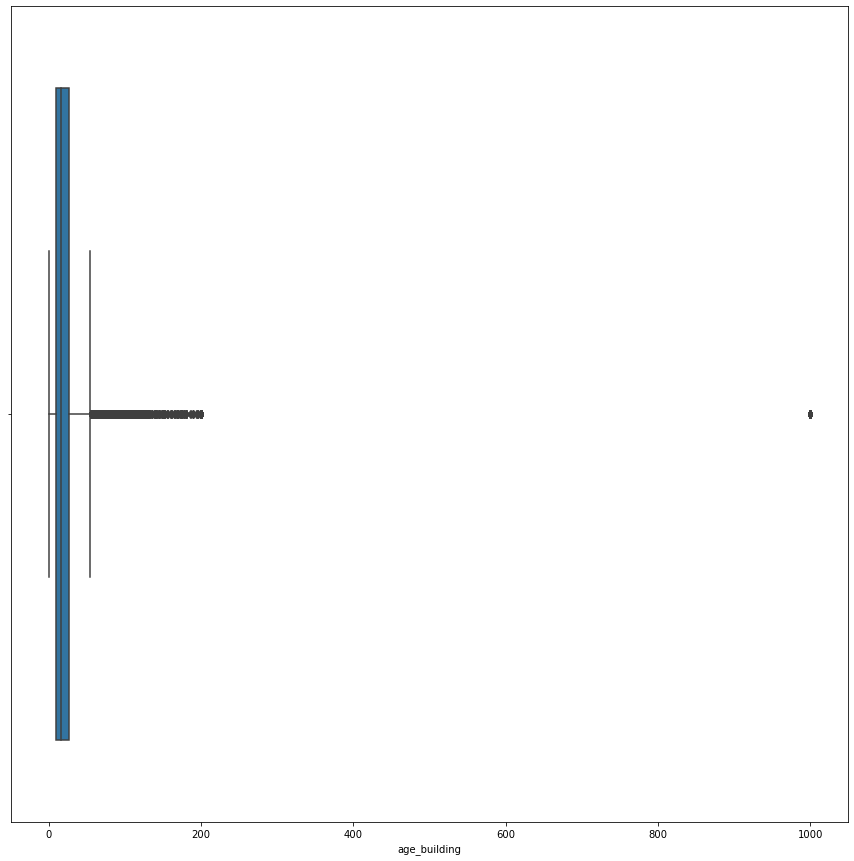

In [23]:
plt.figure(figsize=(15, 15))
sns.boxplot(building['age_building'])
plt.show()

In [24]:
Q1 = np.quantile(building["age_building"], 0.25)
Q3 = np.quantile(building["age_building"], 0.75)
IQR = Q3 - Q1
Up = Q3 + (1.5*IQR)
Low = Q1 - (1.5*IQR)
print("IQR Dari Age: ", IQR)
print("Upper Boundaries dari Age: ", Up)
print("Lower Boundaries dari Age: ", Low)

IQR Dari Age:  18.0
Upper Boundaries dari Age:  54.0
Lower Boundaries dari Age:  -18.0


In [25]:
building = building[building['age_building'] <= 150]

In [26]:
building['age_building'].unique()

array([  9,  15,  20,  30,  18,  13,   8,  22,  10,   3,   2,   7,  50,
        29,  25,  14,  23,  40,   1,  82,  35,  60,  45,  11,  32,  16,
        27,  12,  65,  33,   4,  24,  47,  99,   5,  70,  80,  44,  75,
        21,   6,  17,  58,  57,  19,  26,  28,  95,  90,  71,  55,  39,
        48,  42,  85,   0,  38,  52,  56,  59,  84,  46,  68, 105,  51,
        41,  62,  61,  36,  34,  78, 100,  54,  72,  31,  43,  37,  49,
        81,  53,  69,  66,  63, 102,  87,  79, 140,  88,  64, 120,  93,
       115,  86, 130,  92,  77,  73,  67,  83,  76, 101, 110,  74, 150,
       111, 119,  96,  98,  94,  91,  89, 125,  97, 123, 103, 112, 133,
       116, 145, 114, 121, 144, 108, 122, 132, 131, 106, 148, 113, 109,
       118, 117, 107, 104, 127, 146, 126, 138, 141, 128, 149, 135, 142,
       136, 124, 134], dtype=int64)

In [27]:
Q1 = np.quantile(building["plinth_area_sq_ft"], 0.25)
Q3 = np.quantile(building["plinth_area_sq_ft"], 0.75)
IQR = Q3 - Q1
Up = Q3 + (1.5*IQR)
Low = Q1 - (1.5*IQR)
print("IQR Dari Area: ", IQR)
print("Upper Boundaries dari Area: ", Up)
print("Lower Boundaries dari Area: ", Low)

IQR Dari Area:  17.649999999999995
Upper Boundaries dari Area:  70.13499999999999
Lower Boundaries dari Area:  -0.46499999999999275


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


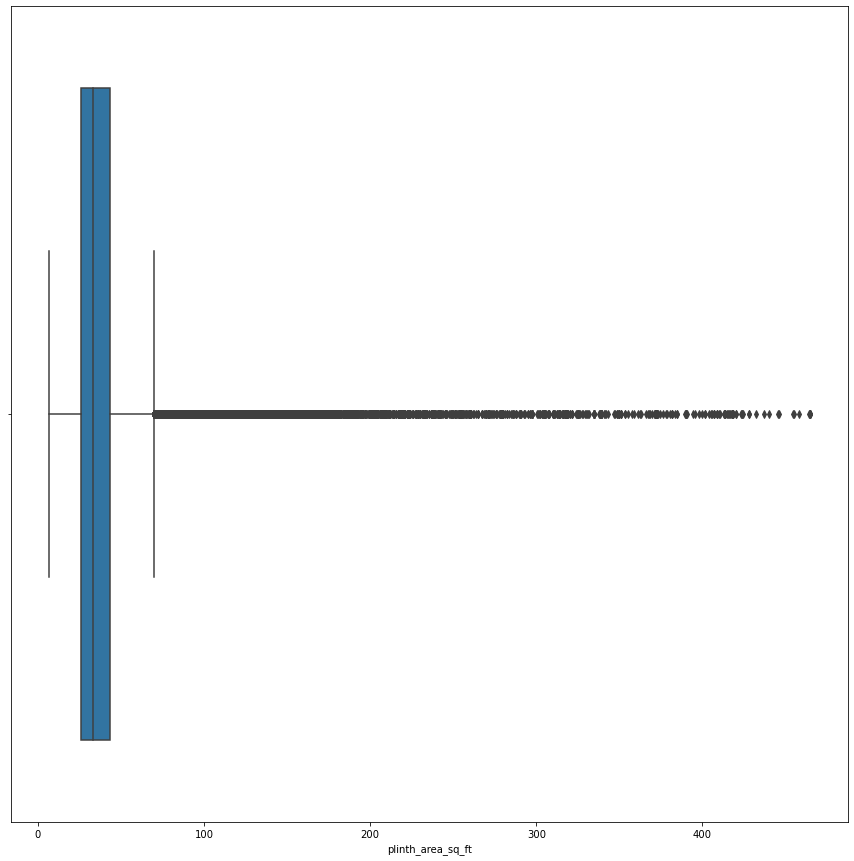

In [28]:
plt.figure(figsize=(15, 15))
sns.boxplot(building['plinth_area_sq_ft'])
plt.show()

Terdapat outliers dari luas area dalam data tersebut, namun saya cek, maksimal dari data tersebut menunjukan sekitar 450, sehingga saya biarkan outliers tersebut

In [29]:
Q1 = np.quantile(building["height_ft_pre_eq"], 0.25)
Q3 = np.quantile(building["height_ft_pre_eq"], 0.75)
IQR = Q3 - Q1
Up = Q3 + (1.5*IQR)
Low = Q1 - (1.5*IQR)
print("IQR Dari Tinggi: ", IQR)
print("Upper Boundaries dari Tinggi: ", Up)
print("Lower Boundaries dari Tinggi: ", Low)

IQR Dari Tinggi:  1.83
Upper Boundaries dari Tinggi:  8.235
Lower Boundaries dari Tinggi:  0.915


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


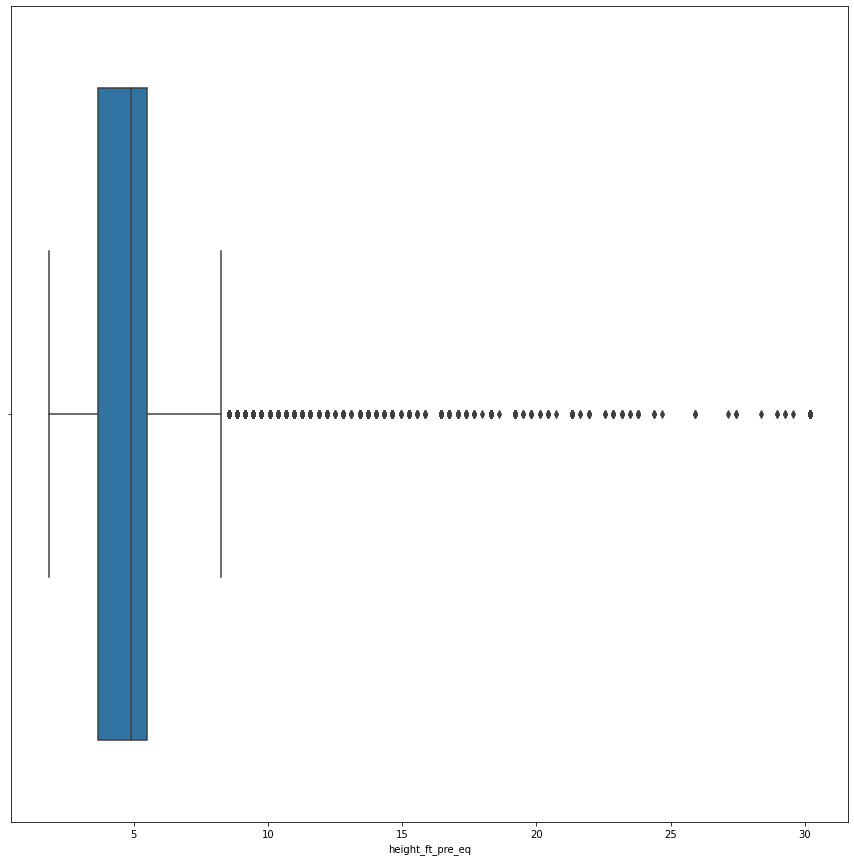

In [30]:
plt.figure(figsize=(15, 15))
sns.boxplot(building['height_ft_pre_eq'])
plt.show()

Terdapat outliers dari data tinggi, namun saya melihat rentang tinggi masih menunjukan tinggi yang wajar

In [31]:
building.to_csv("D:\Project\Project\earthquake\earthquake_clean.csv")

In [32]:
building.shape

(758601, 32)

Data Sampling


dikarenakan jumlah data yang banyak maka saya mencoba mengambil sample dengan rumus


(group sample size = (group population / total population) x ideal sample size)

cek ideal sampel size melalui https://www.qualtrics.com/blog/calculating-sample-size/ 

In [33]:
print((len(building[building['damage'] == 'High Damage']) / len(building.index)) * 16223)

print((len(building[building['damage'] == 'Low Damage']) / len(building.index)) * 16223)

print(16223 / len(building.index))

9784.7272360569
6438.2727639431005
0.021385418685184964


In [34]:
sample = building.groupby('damage').apply(lambda x: x.sample(frac=0.05))

In [35]:
## cek perbandingan damage dalam dan sampel
print(len(building[building['damage'] == 'High Damage']) / len(building.index))
print(len(sample[sample['damage'] == 'High Damage']) / len(sample.index))

0.6031391996583184
0.6031373582915898


In [36]:
sample.head()

Unnamed: 0   building_id  district_id  vdcmun_id  ward_id  \
damage                                                                          
High Damage 437810      437810  281802000951           28       2801   280106   
            375581      375581  245806000431           24       2409   240902   
            453678      453678  283003000911           28       2805   280503   
            715302      715302  362709003091           36       3607   360708   
            275891      275891  234209003191           23       2309   230903   

                    count_floors_pre_eq  count_floors_post_eq  age_building  \
damage                                                                        
High Damage 437810                    3                     0            25   
            375581                    2                     2            25   
            453678                    1                     0             1   
            715302                    2                     0            23   
            275891                    2                     2            54   

                    plinth_area_sq_ft  height_ft_pre_eq  ...  \
damage                                                   ...   
High Damage 437810              27.87              7.62  ...   
            375581              17.84              6.40  ...   
            453678              39.02              2.74  ...   
            715302              29.91              5.49  ...   
            275891              33.82              4.27  ...   

                    has_superstructure_mud_mortar_brick  \
damage                                                    
High Damage 437810                                    0   
            375581                                    0   
            453678                                    0   
            715302                                    0   
            275891                                    0   

                   has_superstructure_cement_mortar_brick  \
damage                                                      
High Damage 437810                                      0   
            375581                                      0   
            453678                                      0   
            715302                                      0   
            275891                                      0   

                   has_superstructure_timber has_superstructure_bamboo  \
damage                                                                   
High Damage 437810                         0                         0   
            375581                         0                         0   
            453678                         0                         0   
            715302                         0                         0   
            275891                         1                         0   

                   has_superstructure_rc_non_engineered  \
damage                                                    
High Damage 437810                                    0   
            375581                                    0   
            453678                                    0   
            715302                                    0   
            275891                                    0   

                   has_superstructure_rc_engineered has_superstructure_other  \
damage                                                                         
High Damage 437810                                0                        0   
            375581                                0                        0   
            453678                                0                        0   
            715302                                0                        0   
            275891                                0                        0   

                                          condition_post_eq  \
damage                                            

In [37]:
sample.shape

(37930, 32)

In [39]:
building.shape

(758601, 32)

In [38]:
# sample.to_csv("D:\Project\Project\earthquake\earthquake_sample.csv")